Data Science with Machine learning coursework - COMP-4030, University of Nottingham

H1N1 and Seasonal Flu Prediction

Author Lokeshwaran Arunachalam 


In [786]:
#Loading the important libraries for Data manipulation and Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the training and testing data

In [787]:
df_f = pd.read_csv("training_set_features.csv")
df_l = pd.read_csv("training_set_labels.csv")
df = pd.merge(df_f, df_l, on='respondent_id', how='inner')
df_test = pd.read_csv("test_set_features.csv")

In [788]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [789]:
#missing values of each column were sorted in Descending order
df.isna().sum().sort_values(ascending = False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

H1N1 Data manipulation and analysis

In [822]:

#the dataset is copied to make changes and analyse
df_h_Ranj = df.copy()

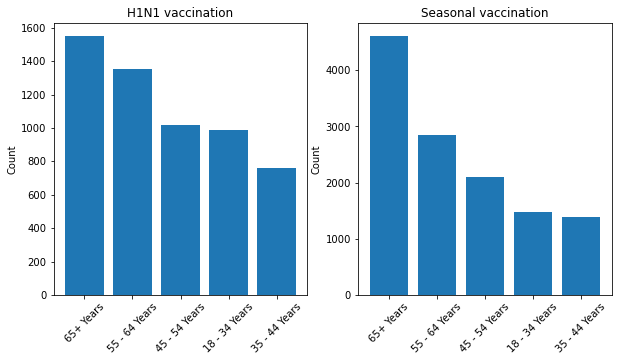

In [823]:

#The H1N1 vaccination with reagrd to age group is visualised using bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
h1n1_vaccinated = df_h_Ranj[df_h_Ranj["h1n1_vaccine"] ==1]
value_age = h1n1_vaccinated["age_group"].value_counts()
ax1.bar(value_age.index, value_age.values)
ax1.set_ylabel('Count')
ax1.set_title("H1N1 vaccination")
ax1.tick_params(axis='x', rotation=45)

#The Seasonal vaccination with reagrd to age group is visualised using bar chart
seas_vaccinated = df_h_Ranj[df_h_Ranj["seasonal_vaccine"] ==1]
value_age = seas_vaccinated["age_group"].value_counts()
ax2.bar(value_age.index, value_age.values)
ax2.set_ylabel('Count')
ax2.set_title("Seasonal vaccination")
ax2.tick_params(axis='x', rotation=45)
plt.show()

The above figure shows that there is significant difference between H1N1 and seasonal flu vaccination. Therefore the data should be preprocessed separately for H1N1 and seasonal Flu

The missing values may contain some useful information therefore the missing values are replaced with -1 for column with datatype integer and for column with datatype string "unknown" value is imputed.

In [824]:

df_h_Ranj["education"].fillna("unknown", inplace=True)
df_h_Ranj["income_poverty"].fillna("unknown", inplace=True)
df_h_Ranj["employment_status"].fillna("unknown", inplace=True)
df_h_Ranj["household_adults"].fillna(-1, inplace=True)
df_h_Ranj["marital_status"].fillna("unknown", inplace=True)
df_h_Ranj["h1n1_concern"].fillna(-1, inplace=True)
df_h_Ranj["h1n1_knowledge"].fillna(-1, inplace=True)
df_h_Ranj["opinion_h1n1_vacc_effective"].fillna(-1, inplace=True)
df_h_Ranj["opinion_h1n1_risk"].fillna(-1, inplace=True)
df_h_Ranj["opinion_h1n1_sick_from_vacc"].fillna(-1, inplace=True)
df_h_Ranj["opinion_seas_vacc_effective"].fillna(-1, inplace=True)
df_h_Ranj["opinion_seas_risk"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_antiviral_meds"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_avoidance"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_face_mask"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_wash_hands"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_large_gatherings"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_outside_home"].fillna(-1, inplace=True)
df_h_Ranj["behavioral_touch_face"].fillna(-1, inplace=True)
df_h_Ranj["doctor_recc_h1n1"].fillna(-1, inplace=True)
df_h_Ranj["doctor_recc_seasonal"].fillna(-1, inplace=True)
df_h_Ranj["chronic_med_condition"].fillna(-1, inplace=True)
df_h_Ranj["child_under_6_months"].fillna(-1, inplace=True)
df_h_Ranj["health_worker"].fillna(-1, inplace=True)
df_h_Ranj["health_insurance"].fillna(-1, inplace=True)
df_h_Ranj["household_children"].fillna(-1, inplace=True)
df_h_Ranj["rent_or_own"].fillna("unknown", inplace=True)
df_h_Ranj["opinion_seas_sick_from_vacc"].fillna(5, inplace=True)

In [825]:

#no of unique values and its count for geological region
df_h_Ranj["hhs_geo_region"].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [826]:

#no of unique values and its count for Employment Industry
df_h_Ranj["employment_industry"].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [827]:

#no of unique values and its count for Employment Occupation
df_h_Ranj["employment_occupation"].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

The number of unique categorical values is more in columns such as  hhs_geo_region, employment_industry, employment_occupation if we encode these columns with oneHotEncoding we will have more number of columns which will be difficult for machine learning algorithm to train and achieve global minimum. Therefore inorder to reduce the dimension we replace the column values with the percentage of h1n1 vaccination with respect to each value in the column

In [828]:

#the attribute called geo region percentage is created in which the values are the percentage of vaccination 
#taken in that region
aggreg = df_h_Ranj.groupby(['hhs_geo_region', 'h1n1_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('hhs_geo_region')['count'].apply(lambda x: 100 * x / x.sum())
seasonal_vaccine_percentage = {}
for d in aggreg.loc[aggreg["h1n1_vaccine"] == 1].iterrows():
    seasonal_vaccine_percentage[d[1][0]] = round(d[1][3] /100, 4)
df_h_Ranj['hhs_geo_region_percentage'] = df_h_Ranj["hhs_geo_region"].map(seasonal_vaccine_percentage)

In [829]:

#the attribute called employment industry percentage is created in which the values are the percentage of people 
#in that industry taken vaccination
df_h_Ranj["employment_industry"].fillna("unknown", inplace=True)
aggreg = df_h_Ranj.groupby(['employment_industry', 'h1n1_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('employment_industry')['count'].apply(lambda x: 100 * x / x.sum())
employment_industry_percentage = {}
for d in aggreg.loc[aggreg["h1n1_vaccine"] == 1].iterrows():
    employment_industry_percentage[d[1][0]] = round(d[1][3] /100, 4)
df_h_Ranj['employment_industry_percentage'] = df_h_Ranj["employment_industry"].map(employment_industry_percentage)

In [830]:

#the attribute called employment occupation percentage is created in which the values are the percentage of people 
#in that occupation taken vaccination

df_h_Ranj["employment_occupation"].fillna("unknown", inplace=True)
aggreg = df_h_Ranj.groupby(['employment_occupation', 'h1n1_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('employment_occupation')['count'].apply(lambda x: 100 * x / x.sum())
employment_occupation_percentage = {}
for d in aggreg.loc[aggreg["h1n1_vaccine"] == 1].iterrows():
    employment_occupation_percentage[d[1][0]] = round(d[1][3] /100,4)
df_h_Ranj['employment_occupation_percentage'] = df_h_Ranj["employment_occupation"].map(employment_occupation_percentage)


In [831]:

#The dataset is copied for analysis
df_h_Lok = df.copy()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

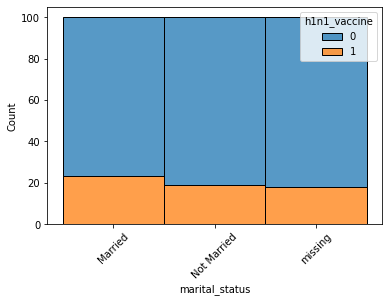

In [832]:

#by replacing missing value we observe the missing value proportion is equal to the not married value
df_h_Lok["marital_status"].fillna("missing",inplace=True)
grouped = df_h_Lok.groupby(['marital_status', 'h1n1_vaccine']).size().reset_index(name='count')
grouped['percentage'] = grouped.groupby('marital_status')['count'].apply(lambda x: 100 * x / x.sum())
sns.histplot(data=grouped, x='marital_status', hue='h1n1_vaccine', weights='percentage', multiple='stack')
plt.xticks(rotation = 45)

From the above chart we can observe missing values in the marital_status column have the same proportion of "Not Married" value therefore the missing values were replaced with "Not Married" value.
The same procedure is followed for other columns. If the missing value proportion doesn't match with any other values in that column we can replace the value with -1 or "unknown" 

In [833]:

#The columns and missing values for the column were mentioned, These arrays will help us to 
#visualise the value in further  analysis
columns = ["education", "income_poverty", "employment_status", 
            "household_adults", "employment_industry",
           "employment_occupation", "marital_status", "h1n1_concern",
           "h1n1_knowledge", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
           "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
           "behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
           "behavioral_wash_hands", "behavioral_large_gatherings","behavioral_outside_home",
           "behavioral_touch_face", "doctor_recc_h1n1","doctor_recc_seasonal",
           "chronic_med_condition", "child_under_6_months", "health_worker"
          ]
missing_values = ["unknown", "unknown", "unknown", -1, 
                  "unknown", "unknown", "unknown", -1, -1, -1,-1,
                  -1, -1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
index = 0;

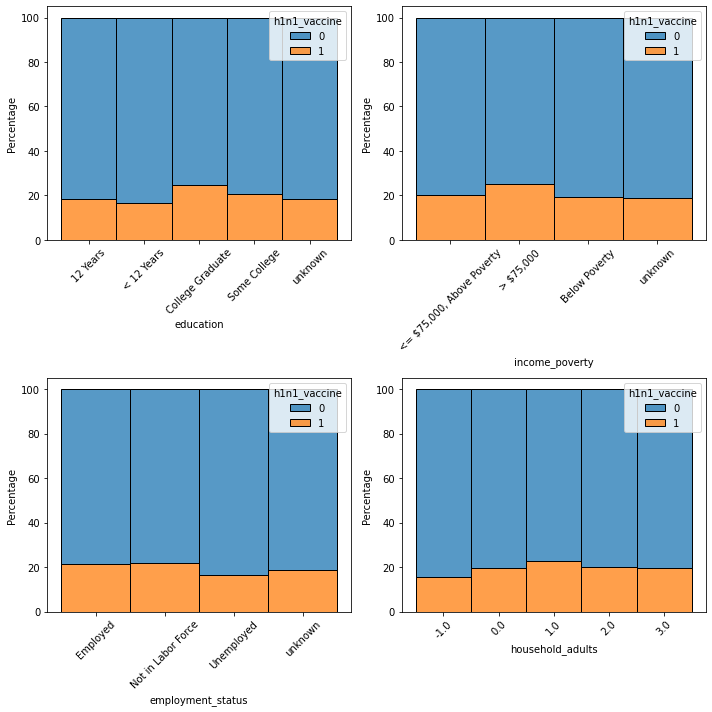

In [834]:

#proportion of values with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].set_ylabel('Percentage')
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

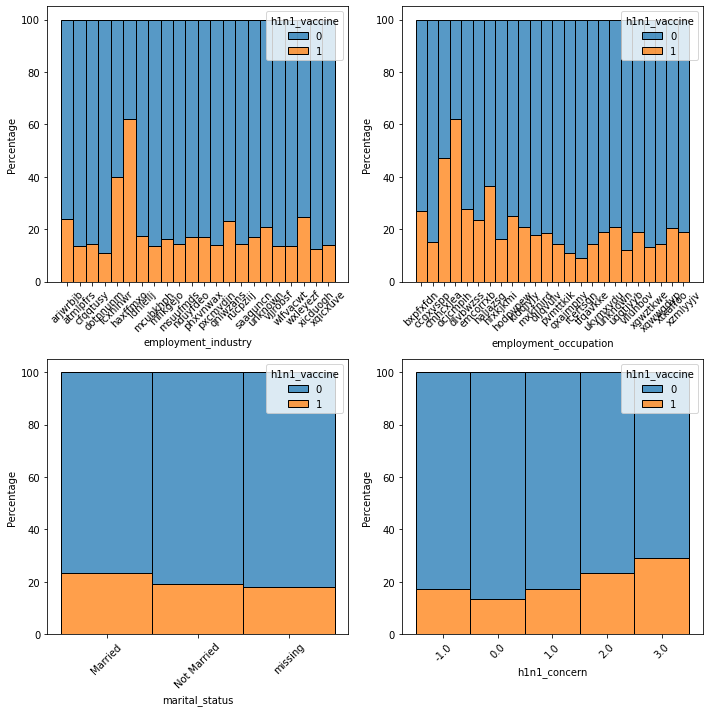

In [835]:

#proportion of values with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].set_ylabel('Percentage')
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()


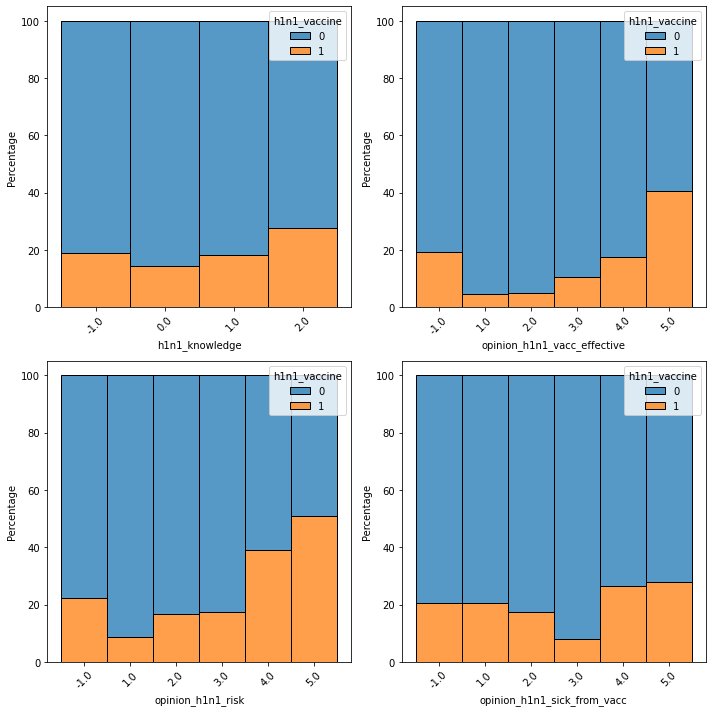

In [836]:

#proportion of values with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].set_ylabel('Percentage')
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

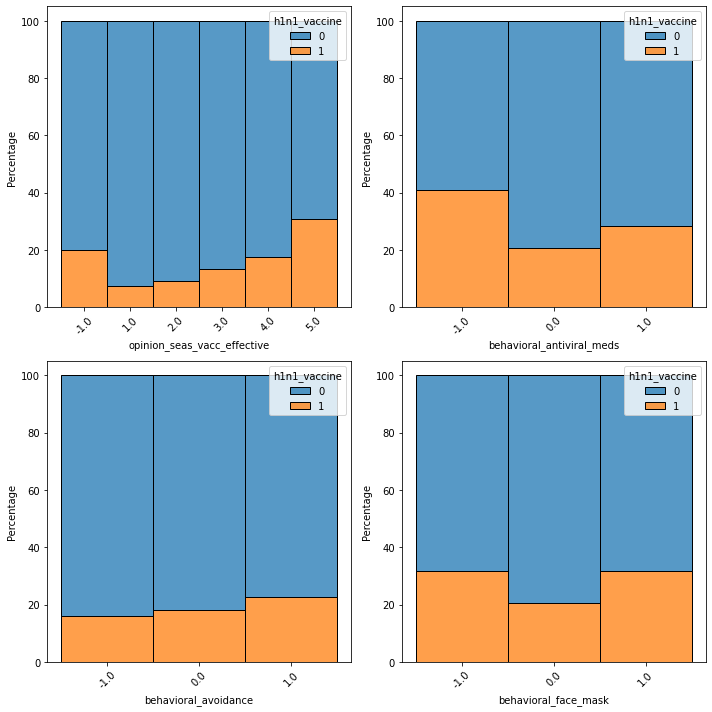

In [837]:

#proportion of values with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].set_ylabel('Percentage')
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

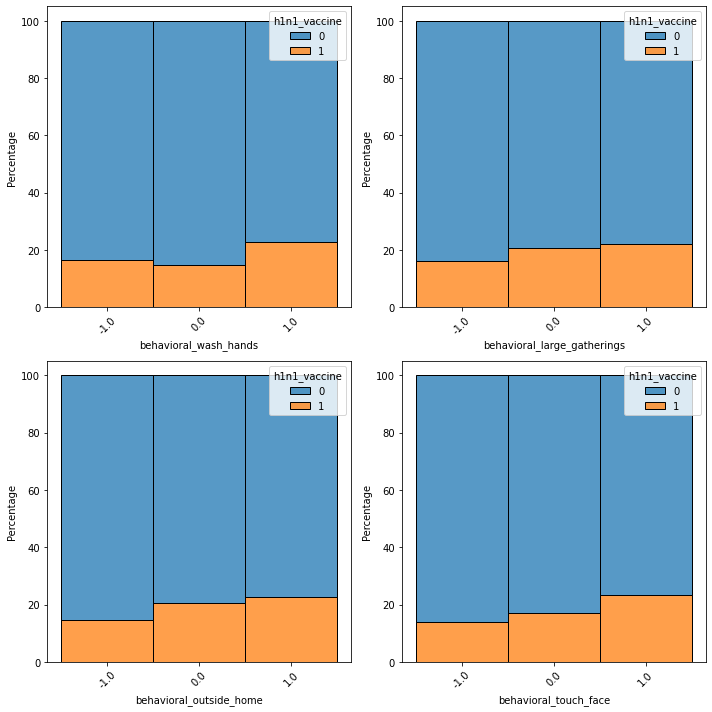

In [838]:

#proportion of values with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].set_ylabel('Percentage')
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

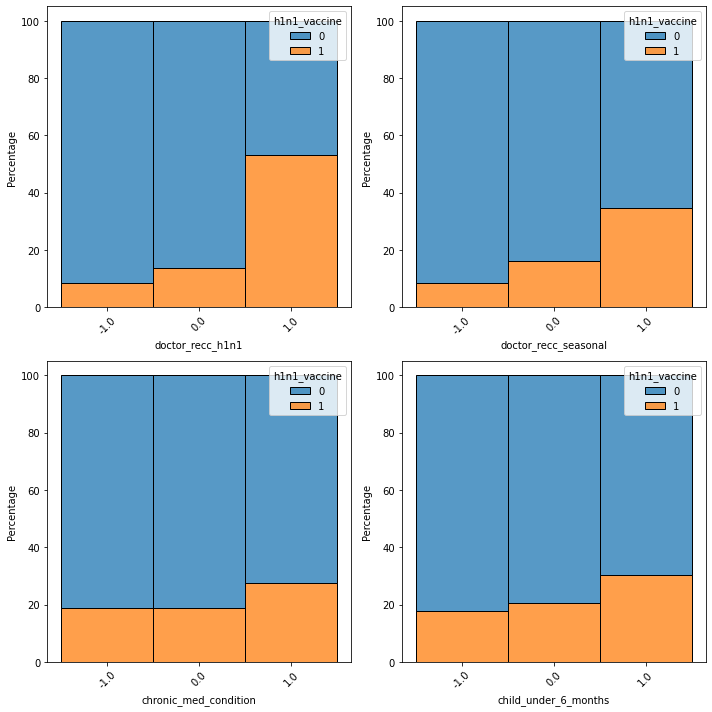

In [839]:

#proportion of values with missing values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].set_ylabel('Percentage')
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

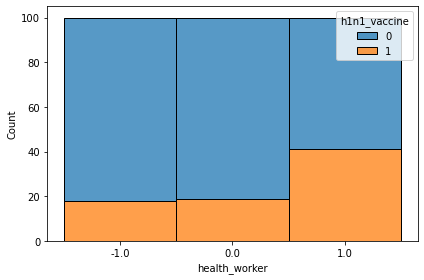

In [840]:

#proportion of values with missing values
df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
grouped = df_h_Lok.groupby([columns[index], 'h1n1_vaccine']).size().reset_index(name='count')
grouped[columns[index]] = grouped[columns[index]].astype(str)
grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
labels = grouped[columns[index]].unique()
sns.histplot(data=grouped, x=columns[index], hue='h1n1_vaccine', weights='percentage', multiple='stack')
plt.tight_layout()
plt.show()

The above charts were compared and missing values were replaced with the values in the column that have same proportion. proportional imputation

In [841]:

#missing values are replaced with the values which have same proportion
df_h_Lok["education"].fillna("< 12 Years", inplace=True)
df_h_Lok["income_poverty"].fillna("<= $75,000, Above Poverty", inplace=True)
df_h_Lok["employment_status"].fillna("Employed", inplace=True)
df_h_Lok["household_adults"].fillna(-1, inplace=True)
df_h_Lok["marital_status"].fillna("unknown", inplace=True)
df_h_Lok["h1n1_concern"].fillna(1, inplace=True)
df_h_Lok["h1n1_knowledge"].fillna(1, inplace=True)
df_h_Lok["opinion_h1n1_vacc_effective"].fillna(4, inplace=True)
df_h_Lok["opinion_h1n1_risk"].fillna(3, inplace=True)
df_h_Lok["opinion_h1n1_sick_from_vacc"].fillna(2, inplace=True)
df_h_Lok["opinion_seas_vacc_effective"].fillna(4, inplace=True)
df_h_Lok["opinion_seas_risk"].fillna(3, inplace=True)
df_h_Lok["behavioral_antiviral_meds"].fillna(2, inplace=True)
df_h_Lok["behavioral_avoidance"].fillna(0, inplace=True)
df_h_Lok["behavioral_face_mask"].fillna(1, inplace=True)
df_h_Lok["behavioral_wash_hands"].fillna(0, inplace=True)
df_h_Lok["behavioral_large_gatherings"].fillna(-1, inplace=True)
df_h_Lok["behavioral_outside_home"].fillna(-1, inplace=True)
df_h_Lok["behavioral_touch_face"].fillna(-1, inplace=True)
df_h_Lok["doctor_recc_h1n1"].fillna(-1, inplace=True)
df_h_Lok["doctor_recc_seasonal"].fillna(-1, inplace=True)
df_h_Lok["chronic_med_condition"].fillna(0, inplace=True)
df_h_Lok["child_under_6_months"].fillna(0, inplace=True)
df_h_Lok["health_worker"].fillna(0, inplace=True)
df_h_Lok["health_insurance"].fillna(-1, inplace=True)
df_h_Lok["household_children"].fillna(-1, inplace=True)
df_h_Lok["rent_or_own"].fillna("Rent", inplace=True)
df_h_Lok["opinion_seas_sick_from_vacc"].fillna(5, inplace=True)

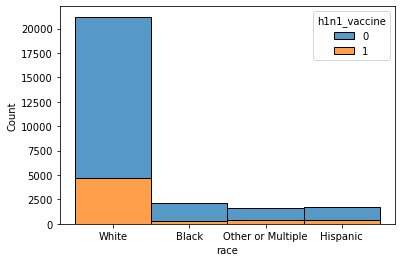

In [842]:

#H1N1 vaccine with regards to race visualised
sns.histplot(data=df_h_Lok, x='race', hue='h1n1_vaccine', multiple='stack')
plt.show()

Some of the column values have some inherent order which can be useful for machine learning algorithm to find the relationship based on the values which have order.
for example, race values can be ordered based on vaccination percentage
white -> Other or Multiple -> Hispanic -> Black 
important note : Here the values of the race are ordered based only on the vaccination percentage of the data.

In [843]:

#The order for ordinal encoding, order were inspired by natural order or by proportion of vaccination
age_order = ["18 - 34 Years", "35 - 44 Years", "45 - 54 Years", "55 - 64 Years", "65+ Years"]
education_order = ["< 12 Years", "12 Years", "Some College", "College Graduate"]
povery_order = ["Below Poverty", "<= $75,000, Above Poverty", "> $75,000"]
employment_order = ["Not in Labor Force","Employed","Unemployed"]
race_order = ["White", "Other or Multiple", "Hispanic", "Black"]
marital_order = ["Married", "Not Married", "unknown"]

Comparision : 
    The values in the column varies for H1n1 and seasonal flu vaccination the data were handled seperately and to reduce dimensionality the columns with more catgorical values were replaced with percentage of vaccination with respect to each value.
    Handling missing values with proportional imputation gave better results than replacing with new unique values such as -1 or "unknown". However, if we could'nt find same proportion equal to missing values we can replace with new unique values. The columns which have inherent order are ordinally encoded instead of One-hot encoding.
    
The best ideas were considered and the data is preprocessed for further analysis 

In [844]:
df_h = df.copy()

In [845]:

df_h["education"].fillna("< 12 Years", inplace=True)
df_h["income_poverty"].fillna("<= $75,000, Above Poverty", inplace=True)
df_h["employment_status"].fillna("Employed", inplace=True)
df_h["household_adults"].fillna(-1, inplace=True)
df_h["marital_status"].fillna("unknown", inplace=True)
df_h["h1n1_concern"].fillna(1, inplace=True)
df_h["h1n1_knowledge"].fillna(1, inplace=True)
df_h["opinion_h1n1_vacc_effective"].fillna(4, inplace=True)
df_h["opinion_h1n1_risk"].fillna(3, inplace=True)
df_h["opinion_h1n1_sick_from_vacc"].fillna(2, inplace=True)
df_h["opinion_seas_vacc_effective"].fillna(4, inplace=True)
df_h["opinion_seas_risk"].fillna(3, inplace=True)
df_h["behavioral_antiviral_meds"].fillna(2, inplace=True)
df_h["behavioral_avoidance"].fillna(0, inplace=True)
df_h["behavioral_face_mask"].fillna(1, inplace=True)
df_h["behavioral_wash_hands"].fillna(0, inplace=True)
df_h["behavioral_large_gatherings"].fillna(-1, inplace=True)
df_h["behavioral_outside_home"].fillna(-1, inplace=True)
df_h["behavioral_touch_face"].fillna(-1, inplace=True)
df_h["doctor_recc_h1n1"].fillna(-1, inplace=True)
df_h["doctor_recc_seasonal"].fillna(-1, inplace=True)
df_h["chronic_med_condition"].fillna(0, inplace=True)
df_h["child_under_6_months"].fillna(0, inplace=True)
df_h["health_worker"].fillna(0, inplace=True)
df_h["health_insurance"].fillna(-1, inplace=True)
df_h["household_children"].fillna(-1, inplace=True)
df_h["rent_or_own"].fillna("Rent", inplace=True)
df_h["opinion_seas_sick_from_vacc"].fillna(5, inplace=True)

In [846]:

aggreg = df_h.groupby(['hhs_geo_region', 'h1n1_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('hhs_geo_region')['count'].apply(lambda x: 100 * x / x.sum())
seasonal_vaccine_percentage = {}
for d in aggreg.loc[aggreg["h1n1_vaccine"] == 1].iterrows():
    seasonal_vaccine_percentage[d[1][0]] = round(d[1][3] /100, 4)
df_h['hhs_geo_region_percentage'] = df_h["hhs_geo_region"].map(seasonal_vaccine_percentage)

In [847]:

df_h["employment_industry"].fillna("unknown", inplace=True)
aggreg = df_h.groupby(['employment_industry', 'h1n1_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('employment_industry')['count'].apply(lambda x: 100 * x / x.sum())
employment_industry_percentage = {}
for d in aggreg.loc[aggreg["h1n1_vaccine"] == 1].iterrows():
    employment_industry_percentage[d[1][0]] = round(d[1][3] /100, 4)
df_h['employment_industry_percentage'] = df_h["employment_industry"].map(employment_industry_percentage)

In [848]:

df_h["employment_occupation"].fillna("unknown", inplace=True)
aggreg = df_h.groupby(['employment_occupation', 'h1n1_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('employment_occupation')['count'].apply(lambda x: 100 * x / x.sum())
employment_occupation_percentage = {}
for d in aggreg.loc[aggreg["h1n1_vaccine"] == 1].iterrows():
    employment_occupation_percentage[d[1][0]] = round(d[1][3] /100,4)
df_h['employment_occupation_percentage'] = df_h["employment_occupation"].map(employment_occupation_percentage)

In [849]:

df_h = df_h.drop(["hhs_geo_region", "employment_industry", "employment_occupation"], axis = 1)

In [850]:

#Dummy estimator which is used in pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class PassthroughTransformer(BaseEstimator):
  def fit(self, X, y = None):
    self.cols = X.columns
    return self

  def transform(self, X, y = None):
    self.cols = X.columns
    return X.values

  def get_feature_names(self):
    return self.cols

In [851]:

#attributes based on type of data were seperated
binary_attributes_n = ["behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", 
                       "behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face", 
                       "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition", 
                       "child_under_6_months", "health_worker", "health_insurance"]

binary_attribute_s = ["sex", "rent_or_own"]

ordinal_attribute_n = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", 
                       "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc", 
                       "household_adults", "household_children","behavioral_antiviral_meds",
                       "hhs_geo_region_percentage", "employment_industry_percentage", 
                       "employment_occupation_percentage","h1n1_concern","h1n1_knowledge"]

ordinal_attribute_s = ["age_group", "education", "income_poverty", "employment_status","race","marital_status"]

nominal_attribute = ["census_msa"]

In [852]:
#using pipeline and column transfer the data were processed parallely
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def do_preprocess(data):
    
    binary_s_pipeline =  make_pipeline(OrdinalEncoder())
                                      
    binary_n_pipeline = make_pipeline(PassthroughTransformer())
    nominal_s = make_pipeline(OneHotEncoder(sparse=False))
                                           
    age_order = ["18 - 34 Years", "35 - 44 Years", "45 - 54 Years", "55 - 64 Years", "65+ Years"]
    education_order = ["< 12 Years", "12 Years", "Some College", "College Graduate"]
    povery_order = ["Below Poverty", "<= $75,000, Above Poverty", "> $75,000"]
    employment_order = ["Not in Labor Force","Employed","Unemployed"]
    race_order = ["White", "Other or Multiple", "Hispanic", "Black"]
    marital_order = ["Married", "Not Married", "unknown"]
    
    ordinal_attribute_s_pipeline = make_pipeline(
        OrdinalEncoder(categories=[age_order, education_order, povery_order,employment_order, race_order, marital_order])
    )
    pass_col = ["h1n1_vaccine", "seasonal_vaccine"]
    passthrough_pipeline = make_pipeline(PassthroughTransformer())
    ordinal_attribute_n_pipeline = make_pipeline(PassthroughTransformer())
    preprocessing = ColumnTransformer(transformers=[
                    ("bin_s", binary_s_pipeline, binary_attribute_s),
                    ("bin_n", binary_n_pipeline, binary_attributes_n),
                    ("nominal", nominal_s, nominal_attribute),
                    ("ordinal_s", ordinal_attribute_s_pipeline, ordinal_attribute_s),
                    ("ordinal_n", ordinal_attribute_n_pipeline, ordinal_attribute_n),
                    ("pass", passthrough_pipeline, pass_col)
                    ], remainder="drop")
    return preprocessing.fit_transform(data)

In [853]:

#processing the data
X = do_preprocess(df_h)



In [854]:

#column heading
columns_label = ['bin_s__sex',
 'bin_s__rent_or_own',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'MSA, Not Principle  City',
 'MSA, Principle City',
 'Non-MSA',
 'age_group',
 'education',
 'income_poverty',
 'employment_status',
 'race',
 'marital_status',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behavioral_antiviral_meds',
 'hhs_geo_region_percentage',
 'employment_industry_percentage',
 'employment_occupation_percentage',
 'h1n1_concern',
 'h1n1_knowledge',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [855]:

#processed data is converted into dataframe
df_h_p = pd.DataFrame(X, columns=columns_label)

In [856]:

df_h_p

,bin_s__sex,bin_s__rent_or_own,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,household_adults,household_children,behavioral_antiviral_meds,hhs_geo_region_percentage,employment_industry_percentage,employment_occupation_percentage,h1n1_concern,h1n1_knowledge,h1n1_vaccine,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.2308,0.2079,0.2089,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.2586,0.1379,0.1331,3.0,2.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,2.0,0.0,0.0,0.2224,0.1415,0.2036,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.2103,0.2079,0.2089,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.2224,0.2456,0.2362,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2224,0.2079,0.2089,2.0,0.0,0.0,0.0
26703,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.1801,0.3979,0.4707,1.0,2.0,0.0,0.0
26704,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.1801,0.2079,0.2089,2.0,2.0,0.0,1.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1.0,0.0,0.0,0.2103,0.3979,0.3649,1.0,1.0,0.0,0.0


In [857]:

correlation_matrix = df_h_p.corr()

In [858]:
 
#columns which have highest correlation were ordered
correlation_matrix["h1n1_vaccine"].abs().sort_values(ascending=False).index

Index(['h1n1_vaccine', 'seasonal_vaccine', 'doctor_recc_h1n1',
       'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'opinion_seas_risk',
       'health_insurance', 'doctor_recc_seasonal',
       'employment_industry_percentage', 'employment_occupation_percentage',
       'opinion_seas_vacc_effective', 'health_worker', 'h1n1_concern',
       'h1n1_knowledge', 'chronic_med_condition', 'behavioral_wash_hands',
       'opinion_h1n1_sick_from_vacc', 'behavioral_touch_face',
       'behavioral_face_mask', 'education', 'child_under_6_months',
       'hhs_geo_region_percentage', 'income_poverty', 'marital_status',
       'behavioral_avoidance', 'behavioral_antiviral_meds', 'age_group',
       'race', 'bin_s__rent_or_own', 'behavioral_outside_home',
       'employment_status', 'bin_s__sex', 'behavioral_large_gatherings',
       'household_adults', 'opinion_seas_sick_from_vacc',
       'MSA, Principle City', 'MSA, Not Principle  City', 'household_children',
       'Non-MSA'],
      dtype='

In [859]:

#based on correlation opinion and doctor recommendation columns were taken into consideration
important_correlation = df_h_p[["h1n1_vaccine","opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
                              "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                              "opinion_seas_risk", "opinion_seas_sick_from_vacc", 
                               "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition"]].corr()

<AxesSubplot:>

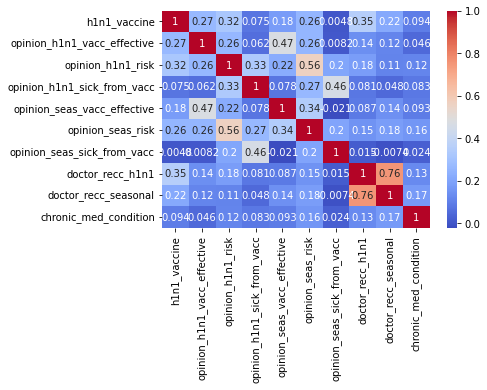

In [860]:
#heat map is used to visualize the correlation
sns.heatmap(important_correlation,
            annot=True, cmap="coolwarm")

In [861]:

#target and remaining columns were divided
train_h = df_h_p.iloc[:,:-2]
target_h = df_h_p.iloc[:,-2]

In [862]:

#Test and the training data were splitted
from sklearn.model_selection import train_test_split
X_tr, X_tt, Y_tr, Y_tt =  train_test_split(train_h, target_h, test_size = 0.2,shuffle=True)

In [657]:

#using randomizedCV with K-fold cross validation 3 optimal parameter for XGBosst classifier is searched
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.01, objective = 'binary:logistic', eval_metric="auc")
param_xgb = {
    "max_depth": [5,8,10,15],
    "subsample" : [1, 0.9,0.8, 0.7],
    "n_estimators" : [100, 120, 200, 250],
    "gamma" : [0, 0.25, 0.5],
    "alpha" : [0, 0.7, 0.9, 1]
    
}
xgb_m = RandomizedSearchCV(estimator=xgb, param_distributions=param_xgb, cv=3,n_jobs=-1, n_iter=30)
xgb_m.fit(X_tr, Y_tr)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_delta_step=None, max_depth=None,
               

In [666]:

#Best parameters according to randomized search
xgb_m.best_params_

{'subsample': 0.8,
 'n_estimators': 250,
 'max_depth': 8,
 'gamma': 0.5,
 'alpha': 0}

In [667]:

#XGBoost classifier using parameters found by randomized search
xgb_best = XGBClassifier(learning_rate = 0.01, objective = 'binary:logistic', eval_metric="auc",
                         gamma = 0.5, alpha=0,max_depth = 8, subsample = 0.8)
                        

In [668]:

#using grid search for n_estimator best value is found
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators" : [250,280,300,320,340]
}
grid_xgb = GridSearchCV(estimator=xgb_best, param_grid=param, cv=5, n_jobs=-1)
grid_xgb.fit(X_tr, Y_tr)

GridSearchCV(cv=5,
             estimator=XGBClassifier(alpha=0, base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0.5, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=8,
                                  

In [669]:

#best param for n_estimator
grid_xgb.best_params_

{'n_estimators': 320}

In [212]:

#XGBoost classifier is updated by n_estimator param found in previous grid search
xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                         gamma = 0.5, alpha=0, max_depth = 8, subsample = 0.8)

In [214]:

#Learning rate is searched using Grid Search
param = {
    "learning_rate" : [0.001, 0.01, 0.1]
}
grid_xgb = GridSearchCV(estimator=xgb_best, param_grid=param, cv=5, n_jobs=-1)
grid_xgb.fit(X_tr, Y_tr)
grid_xgb.best_params_

{'learning_rate': 0.01}

In [670]:

#XGBoost classifier updated with learning rate
xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                          alpha=0, max_depth = 8, subsample = 0.8, learning_rate = 0.01)

In [672]:

#reguarization parameter gamma value is searched using grid search
param = {
    "gamma" : [0.5, 0.6, 0.7, 0.8]
}
grid_xgb = GridSearchCV(estimator=xgb_best, param_grid=param, cv=5, n_jobs=-1)
grid_xgb.fit(X_tr, Y_tr)
grid_xgb.best_params_

{'gamma': 0.8}

In [673]:

#regularization param gamma is updated
xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                          gamma = 0.8, max_depth = 8, subsample = 0.8, learning_rate = 0.01)

In [674]:

#L1 regularization term alpha value is searched using grid search
param = {
    "alpha" : [0.6, 0.7, 0.8, 0.9, 1]
}
grid_xgb = GridSearchCV(estimator=xgb_best, param_grid=param, cv=5, n_jobs=-1)
grid_xgb.fit(X_tr, Y_tr)
grid_xgb.best_params_

{'alpha': 0.6}

In [675]:

#alpha value is updated in XGBoost classifier
xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                          gamma = 0.5, alpha = 0.6, subsample = 0.7, learning_rate = 0.01)

In [676]:

#Max tree depth param is searched using grid search
param = {
    "max_depth" : [8, 10, 12, 14, 16]
}
grid_xgb = GridSearchCV(estimator=xgb_best, param_grid=param, cv=5, n_jobs=-1)
grid_xgb.fit(X_tr, Y_tr)
grid_xgb.best_params_

{'max_depth': 8}

In [677]:

#max tree depth param is updated
xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                          gamma = 0.5, alpha = 1, subsample = 0.7, learning_rate = 0.01, max_depth = 8)

In [678]:

#ROC AUC score is found using K fold cross validation where k = 5 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_best, X_tr, Y_tr, cv=5, n_jobs=-1, scoring='roc_auc')
scores

array([0.85925241, 0.87003659, 0.87437293, 0.86672023, 0.86271778])

In [679]:

#Randomized search is used to find optimal parameters for Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
dcls = RandomForestClassifier(n_jobs=-1, class_weight = "balanced")
param_dist = {
    'n_estimators': np.arange(360, 370, 3),
    'max_depth': [22,23,24,25],
    'max_features': ['sqrt', 'log2','auto'],
    "min_samples_leaf" : [2, 3, 4],

    }

random_search = RandomizedSearchCV(estimator=dcls, param_distributions=param_dist, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_tr, Y_tr)
random_search.best_params_

{'n_estimators': 360,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 22}

In [680]:

#using best params found in Random search random forest classifier is created
rf_best = RandomForestClassifier(n_estimators = 360, min_samples_leaf = 2, max_features = "log2", 
                                 class_weight = "balanced", max_depth = 22, n_jobs=-1)

In [681]:

#Maximum samples used to train a tree is found using grid search
param = {
    "max_samples" : [0.7, 0.8, 0.9, 1]
}
grid_rfc = GridSearchCV(estimator=rf_best, param_grid=param, cv=5, n_jobs=-1)
grid_rfc.fit(X_tr, Y_tr)
grid_rfc.best_params_

{'max_samples': 0.7}

In [682]:

#max sample size param is updated in Random forest classifier
rf_best = RandomForestClassifier(n_estimators = 360, min_samples_leaf = 2, max_features = "auto", 
                                 class_weight = "balanced", max_samples = 0.7)

In [683]:

#maximum depth of tree param is found using grid search
param = {
    "max_depth" : [12, 20, 24, 26, 28]
}
grid_rfc = GridSearchCV(estimator=rf_best, param_grid=param, cv=5, n_jobs=-1)
grid_rfc.fit(X_tr, Y_tr)
grid_rfc.best_params_

{'max_depth': 28}

In [235]:

#maximum tree depth param is updated
rf_best = RandomForestClassifier(n_estimators = 360, min_samples_leaf = 2, 
                                 class_weight = "balanced", max_samples = 0.7, max_depth = 28)

In [236]:

#size of random subset param is found using grid search
param = {
    "max_features" : ["sqrt", "log2", "auto"]
}
grid_rfc = GridSearchCV(estimator=rf_best, param_grid=param, cv=5, n_jobs=-1)
grid_rfc.fit(X_tr, Y_tr)
grid_rfc.best_params_

{'max_features': 'sqrt'}

In [684]:

#max feature param is updated in random forest classifier
rf_best = RandomForestClassifier(n_estimators = 360, min_samples_leaf = 2,max_features = "sqrt",
                                 class_weight = "balanced", max_samples = 0.7, max_depth = 28)

In [685]:

#random forest classifier ROC AUC score is obtained using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_best, X_tr, Y_tr, cv=5, n_jobs=-1, scoring='roc_auc')
scores

array([0.85574324, 0.86689764, 0.86790668, 0.86490329, 0.85763582])

In [686]:
#The best models of Random forest and XGBosst classifier is fitted in training sets and values predicted probability for test sets 

xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                         gamma = 0.5, alpha = 1, subsample = 0.7, learning_rate = 0.01, max_depth = 8)
xgb_best.fit(X_tr, Y_tr)
Y_xgp = xgb_best.predict_proba(X_tt)[:, 1]


rf_best = RandomForestClassifier(n_estimators = 360, min_samples_leaf = 2,max_features = "sqrt",
                                 class_weight = "balanced", max_samples = 0.7, max_depth = 28)
rf_best.fit(X_tr, Y_tr)
Y_rfp = rf_best.predict_proba(X_tt)[:, 1]

In [687]:
from sklearn.metrics import roc_curve
#Fals poitive and true positive rates are obtained compared to predicted test sets

fpr_xg, tpr_xg, thresholds = roc_curve(Y_tt, Y_xgp)

fpr_rf, tpr_rf, thresholds = roc_curve(Y_tt, Y_rfp)


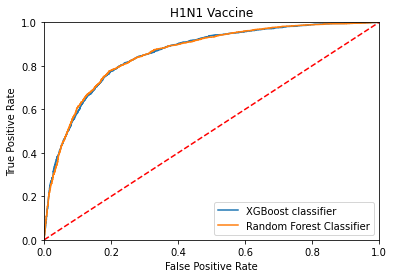

In [747]:

plt.plot(fpr_xg, tpr_xg, label="XGBoost classifier") 
plt.plot(fpr_rf, tpr_rf, label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("H1N1 Vaccine")
plt.legend(loc="lower right")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.show()

In [689]:
#predicted classes for test sets

Y_xgp = xgb_best.predict(X_tt)

Y_rfp = rf_best.predict(X_tt)

In [690]:

#precision, recall and f1score for test set is obtained
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(Y_tt, Y_xgp))
print(recall_score(Y_tt, Y_xgp))
print(f1_score(Y_tt, Y_xgp))

0.7356770833333334
0.5
0.59536354056902


In [691]:

#precision, recall and f1score for test set is obtained
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(Y_tt, Y_rfp))
print(recall_score(Y_tt, Y_rfp))
print(f1_score(Y_tt, Y_rfp))

0.6869369369369369
0.5398230088495575
0.6045589692765113


In [695]:

#ROC AUC score for test set is obtained
from sklearn.metrics import roc_auc_score
Y_xgprob = xgb_best.predict_proba(X_tt)[: ,1]
roc_auc_score(Y_tt, Y_xgprob)

0.8739942347611964

In [697]:

#ROC AUC score for test set is obtained
from sklearn.metrics import roc_auc_score
Y_rfproba = rf_best.predict_proba(X_tt)[:, 1]
roc_auc_score(Y_tt, Y_rfproba)

0.870668297069477

In [ ]:

#XGBoost predicted probability of training set using cross validation
from sklearn.model_selection import cross_val_predict
xgb_best = XGBClassifier(n_estimators = 320, objective = 'binary:logistic', eval_metric="auc",
                         gamma = 0.5, alpha = 1, subsample = 0.7, learning_rate = 0.01, max_depth = 8)
crs_rf = cross_val_predict(xgb_best, train_h, target_h, cv = 3, method = "predict_proba")

In [701]:

#ROC AUC score of XGBoost on training set using cross validation
from sklearn.metrics import roc_auc_score
roc_auc_score(target_h, crs[:, 1])

0.868786496289355

In [698]:

#random forest predicted probability of training set using cross validation
rf_best = RandomForestClassifier(n_estimators = 360, min_samples_leaf = 2,max_features = "sqrt",
                                 class_weight = "balanced", max_samples = 0.7, max_depth = 28)

crs_rf = cross_val_predict(rf_best, train_h, target_h, cv = 3, method = "predict_proba")

In [699]:

#ROC AUC score of Random Forest on training set using cross validation
roc_auc_score(target_h, crs_rf[:, 1])

0.8655652837935105

In [702]:

#Random Forest Classifier with depth 3 to find correlation among opinion and doctor recommendation
rf_temp = RandomForestClassifier(n_estimators = 30, min_samples_leaf = 2,
                                 class_weight = "balanced", max_depth = 3, random_state=123)

In [704]:

#columns that have high correlation such as opinion and doctor recommendation column were used to fit the model
rf_temp.fit(train_h[["opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
                    "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                    "opinion_seas_risk", "opinion_seas_sick_from_vacc", "doctor_recc_h1n1",
                    "doctor_recc_seasonal", "chronic_med_condition"]],
                    target_h)

RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=2,
                       n_estimators=30, random_state=123)

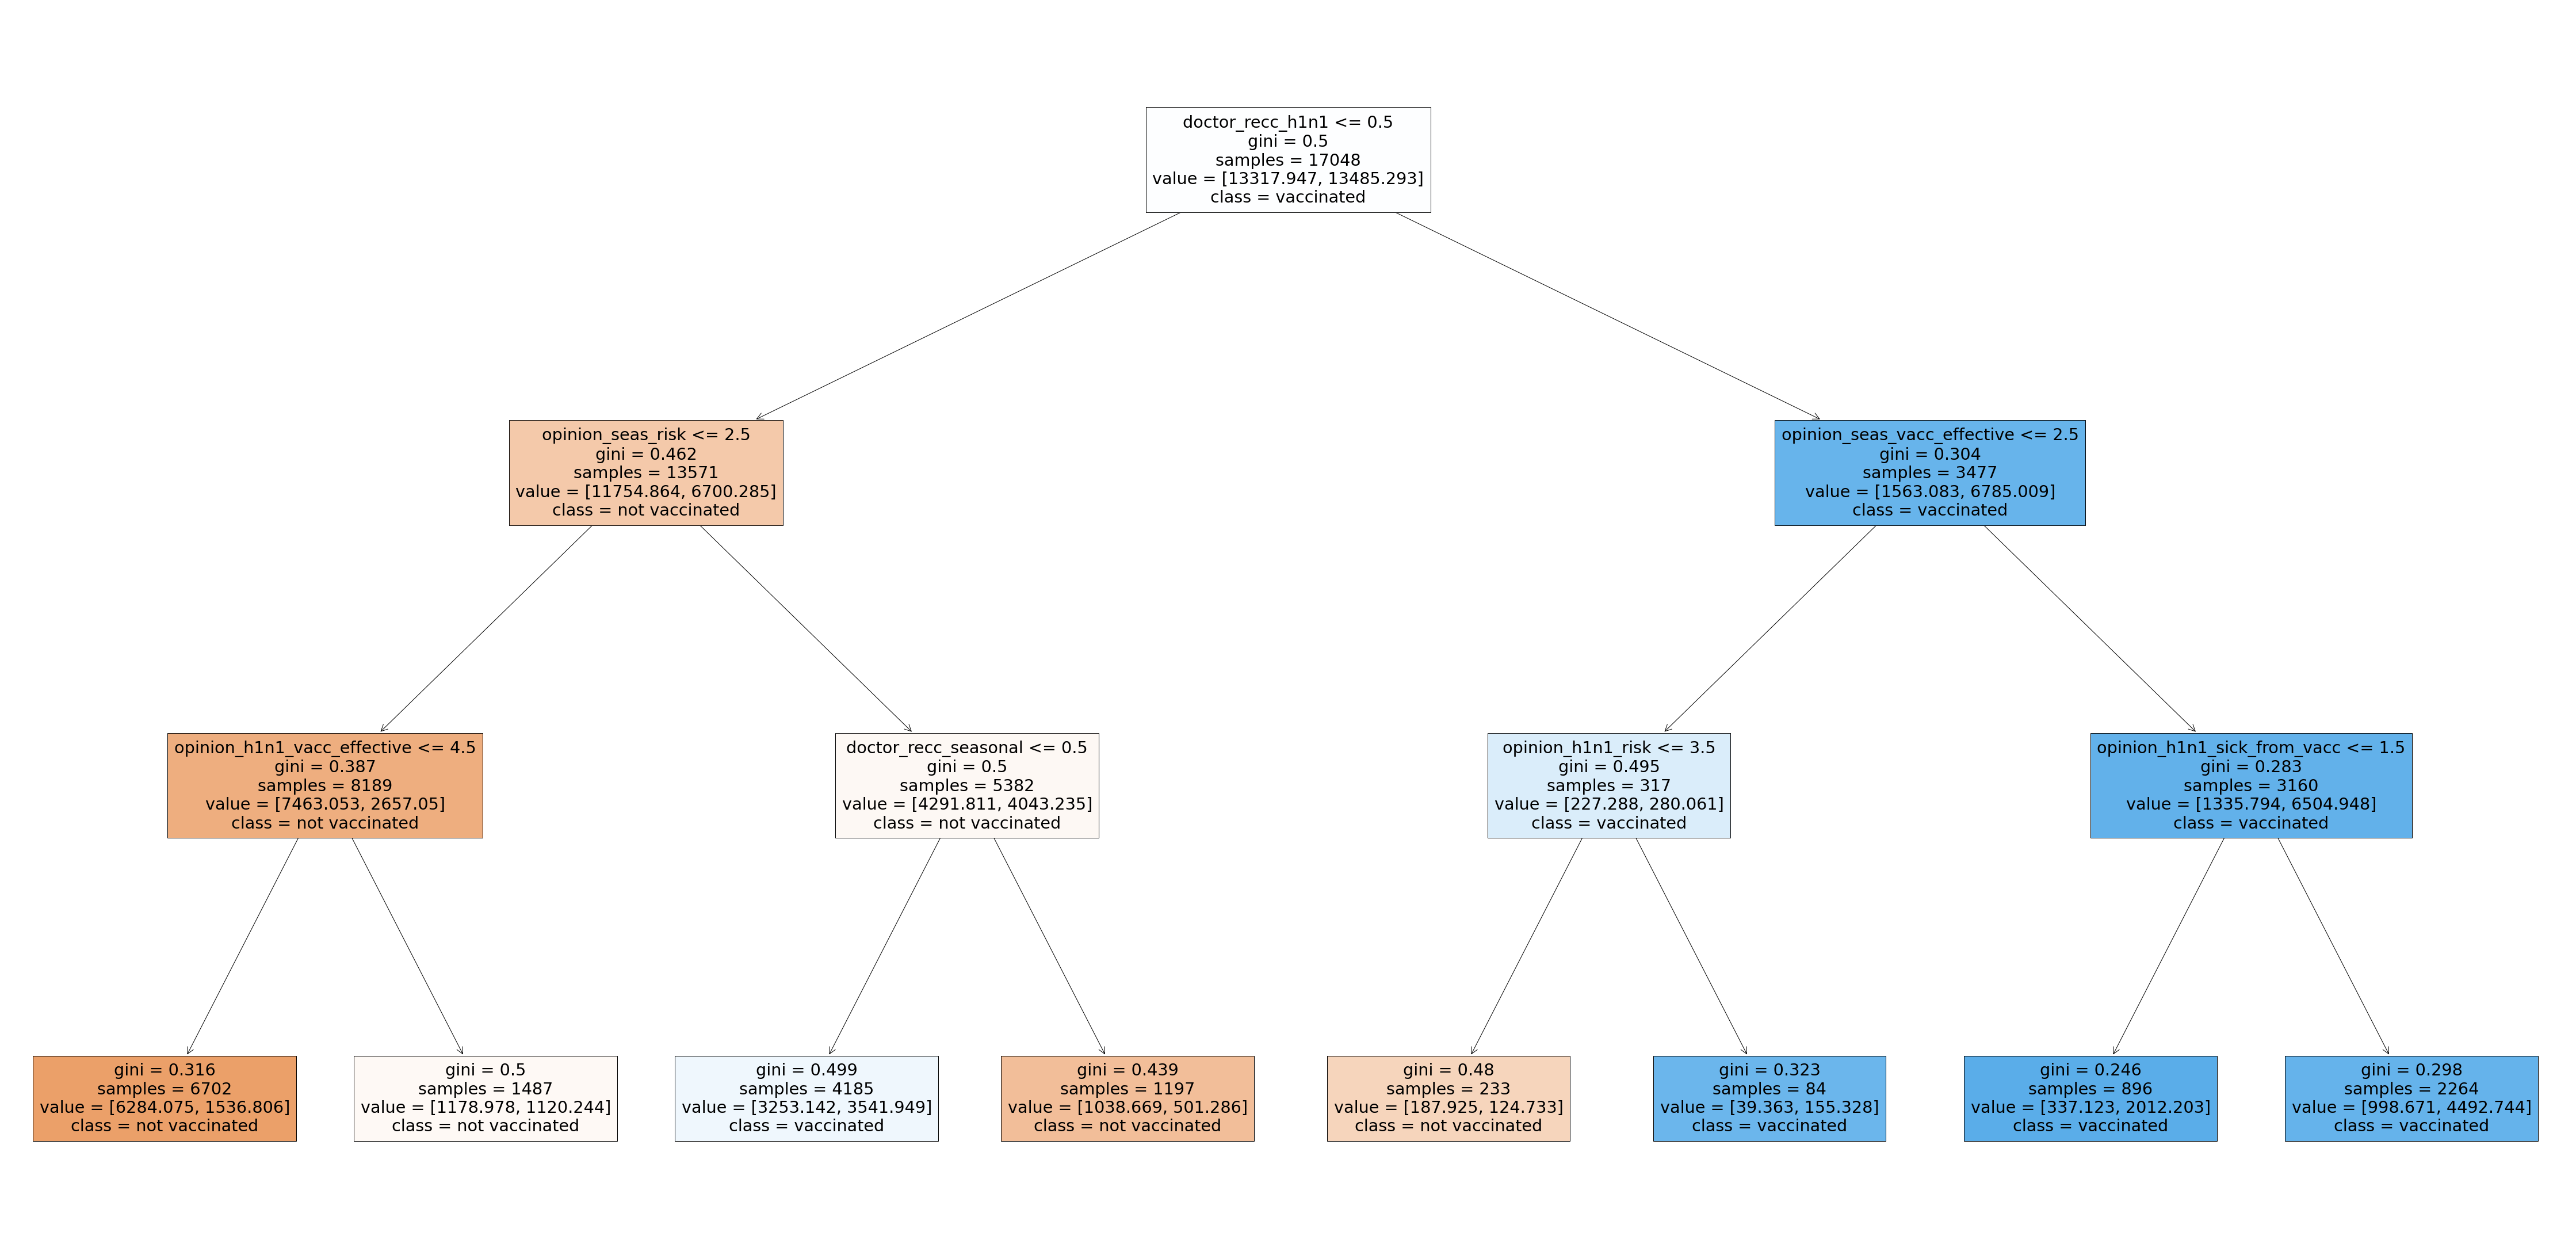

In [705]:

#Random forest estimator tree plotted
from sklearn.tree import plot_tree
tree = rf_temp.estimators_[0]
plt.figure(figsize=(80,40))
plot_tree(tree, feature_names = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
                    "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                    "opinion_seas_risk", "opinion_seas_sick_from_vacc", "doctor_recc_h1n1",
                    "doctor_recc_seasonal", "chronic_med_condition"],
          class_names=['not vaccinated', "vaccinated"],filled=True);

In [624]:

#contigency table is created for doctor recommendation on h1n1 and h1n1 vaccination to perform chisq test
contingency_table = pd.crosstab(target_h, train_h['doctor_recc_h1n1'])
contingency_table


doctor_recc_h1n1,0.0,1.0
h1n1_vaccine,,
0.0,18504,2529
1.0,2795,2879


Null Hypothesis : There is no relationship between doctor recommendation of H1n1 vaccine and H1N1 vaccination

Alternate Hypothesis : There is relationship between doctor recommendation of H1n1 vaccine and H1N1 vaccination

In [625]:

#Chi square test is created for doctor recommendation on h1n1 and h1n1 vaccination.
from scipy.stats import chi2_contingency
from scipy.stats import chi2
alpha = 0.05 
chisq, p, df, expected = chi2_contingency(contingency_table)
critical_chisq_value = chi2.ppf(1 - alpha, df)
print("Chi-square critical value:" , critical_chisq_value)
print("Chi-square value:", chisq)
print("Probability:", p)
print("Degrees of freedom:", df)
print("Expected frequencies:", expected)

Chi-square critical value: 3.841458820694124
Chi-square value: 4145.294661439282
Probability: 0.0
Degrees of freedom: 1
Expected frequencies: [[16773.94941401  4259.05058599]
 [ 4525.05058599  1148.94941401]]


In [626]:

if p < alpha: 
    print("we reject the Null hypothesis")
    print("There is 95% confidence that there is relationship between doctor recommendation of H1n1 vaccine and H1N1 vaccination")
else:
    print("we accept the Null hypothesis")
    print("There is 95% confidence that there is no relationship between doctor recommendation of H1n1 vaccine and H1N1 vaccination")

we reject the Null hypothesis
There is 95% confidence that there is relationship between doctor recommendation of H1n1 vaccine and H1N1 vaccination


In [750]:

#Chi square test is created for opinion h1n1 vaccination effective and h1n1 vaccination.
contingency_table = pd.crosstab(target_h, train_h['opinion_h1n1_vacc_effective'])
contingency_table

opinion_h1n1_vacc_effective,1.0,2.0,3.0,4.0,5.0
h1n1_vaccine,,,,,
0.0,844,1763,4224,9937,4265
1.0,42,95,499,2137,2901


Null Hypothesis : There is no relationship between opinion of H1N1 vaccine effective and H1N1 vaccination

Alternate Hypothesis : There is relationship between opinion of H1N1 vaccine effective and H1N1 vaccination

In [751]:

#Chi square test is created for H1N1 vaccination effective and h1n1 vaccination.
chisq, prob, df, expected = chi2_contingency(contingency_table)
alpha = 0.05 
critical_chisq_value = chi2.ppf(1 - alpha, df)
print("Chi-square critical value:" , critical_chisq_value)
print("Chi-square value:", chisq)
print("Probability:", prob)
print("Degrees of freedom:", df)
print("Expected frequencies:", expected)

Chi-square critical value: 9.487729036781154
Chi-square value: 2430.9882283574093
Probability: 0.0
Degrees of freedom: 4
Expected frequencies: [[ 697.76605384 1463.2610926  3719.58134571 9508.83446287 5643.55704497]
 [ 188.23394616  394.7389074  1003.41865429 2565.16553713 1522.44295503]]


In [752]:

if prob < alpha: 
    print("we reject the Null hypothesis")
    print("There is 95% confidence that there is relationship between opinion on H1N1 vaccine effective and H1N1 vaccination")
else:
    print("we accept the Null hypothesis")
    print("There is 95% confidence that there is no relationship between opinion on H1N1 vaccine effective and H1N1 vaccination")

we reject the Null hypothesis
There is 95% confidence that there is relationship between opinion on H1N1 vaccine effective and H1N1 vaccination


In [630]:

#Chi square test is created for opinion seasonal vaccination effective and h1n1 vaccination.
contingency_table = pd.crosstab(target_h, train_h['opinion_seas_vacc_effective'])
contingency_table

opinion_seas_vacc_effective,1.0,2.0,3.0,4.0,5.0
h1n1_vaccine,,,,,
0.0,1132,2001,1054,9949,6897
1.0,89,205,162,2142,3076


Null Hypothesis : There is no relationship between opinion of seasonal vaccine effective and H1N1 vaccination

Alternate Hypothesis : There is relationship between opinion of seasonal vaccine effective and H1N1 vaccination

In [631]:

#Chi square test is created for opinion of seasonal vaccine effective and h1n1 vaccination.
chisq, prob, df, expected = chi2_contingency(contingency_table)
alpha = 0.05 
critical_chisq_value = chi2.ppf(1 - alpha, df)
print("Chi-square critical value:" , critical_chisq_value)
print("Chi-square value:", chisq)
print("Probability:", prob)
print("Degrees of freedom:", df)
print("Expected frequencies:", expected)

Chi-square critical value: 9.487729036781154
Chi-square value: 1015.2358583203843
Probability: 1.7812550798256757e-218
Degrees of freedom: 4
Expected frequencies: [[ 961.59407646 1737.32721758  957.65634478 9522.22275059 7854.19961059]
 [ 259.40592354  468.67278242  258.34365522 2568.77724941 2118.80038941]]


In [632]:
if prob < alpha: 
    print("we reject the Null hypothesis")
    print("There is 95% confidence that there is relationship between opinion on seasonal vaccine effective and H1N1 vaccination")
else:
    print("we accept the Null hypothesis")
    print("There is 95% confidence that there is no relationship between opinion on seasonal vaccine effective and H1N1 vaccination")

we reject the Null hypothesis
There is 95% confidence that there is relationship between opinion on seasonal vaccine effective and H1N1 vaccination


Seasonal flu preprocessing and Analysis

The same data preprocessing technique like H1N1 followed

In [863]:
df_s = df.copy()

In [864]:

#columns and missing value for analyses on seasonal vaccine

columns = ["education", "income_poverty", "employment_status", 
            "household_adults", "employment_industry",
           "employment_occupation", "marital_status", "h1n1_concern",
           "h1n1_knowledge", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
           "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
           "behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
           "behavioral_wash_hands", "behavioral_large_gatherings","behavioral_outside_home",
           "behavioral_touch_face", "doctor_recc_h1n1","doctor_recc_seasonal",
           "chronic_med_condition", "child_under_6_months", "health_worker"
          ]
missing_values = ["unknown", "unknown", "unknown", -1, 
                  "unknown", "unknown", "unknown", -1, -1, -1,-1,
                  -1, -1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
index = 0;

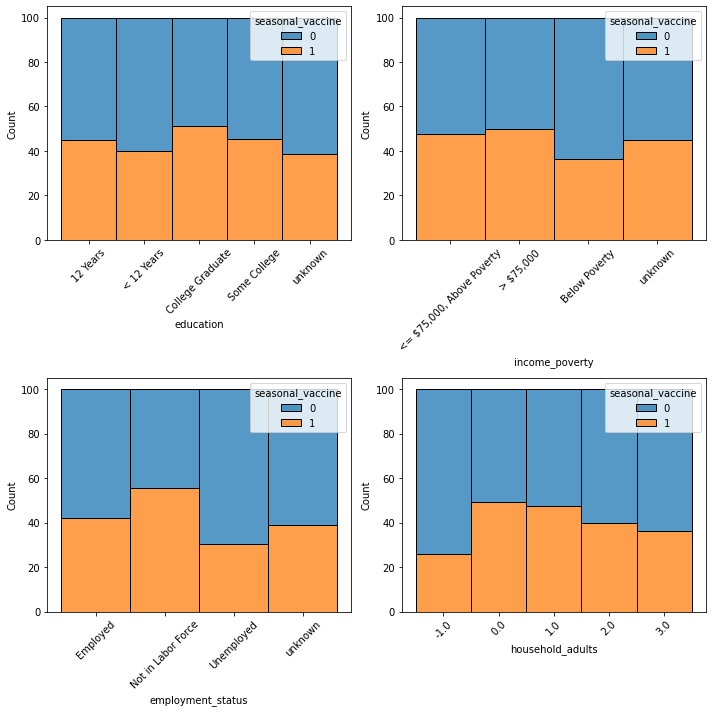

In [865]:

#proportion of values with missing values with respect to seasonal vaccine
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

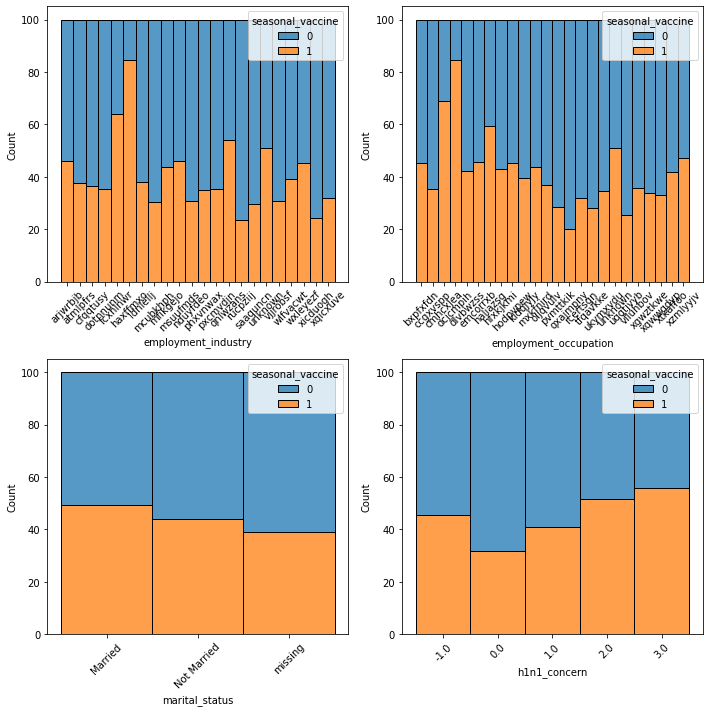

In [866]:

#proportion of values with missing values with respect to seasonal vaccine
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

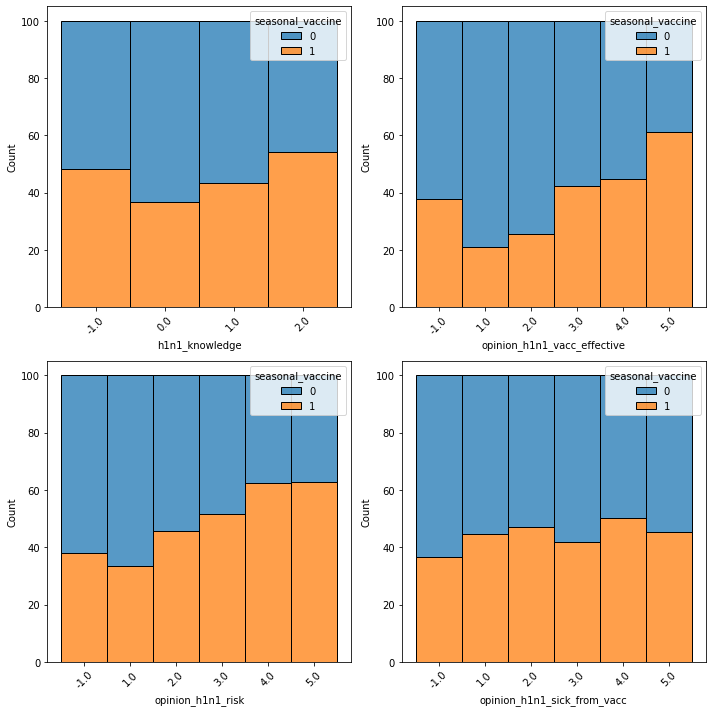

In [867]:

#proportion of values with missing values with respect to seasonal vaccine
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

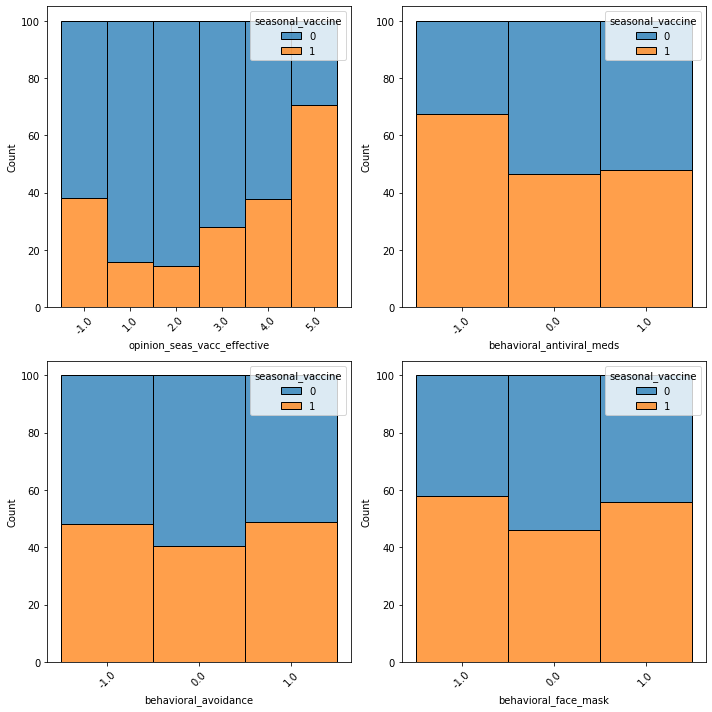

In [868]:

#proportion of values with missing values with respect to seasonal vaccine
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

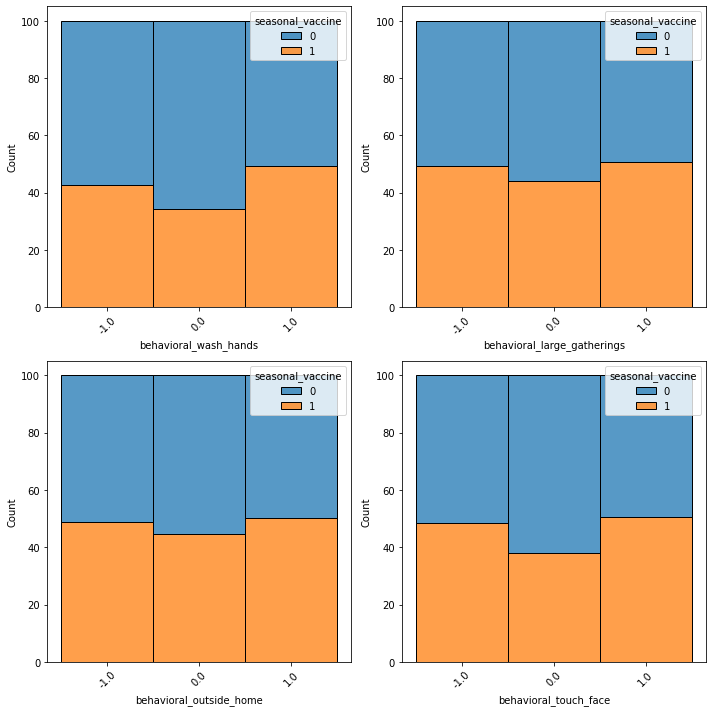

In [869]:

#proportion of values with missing values with respect to seasonal vaccine
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

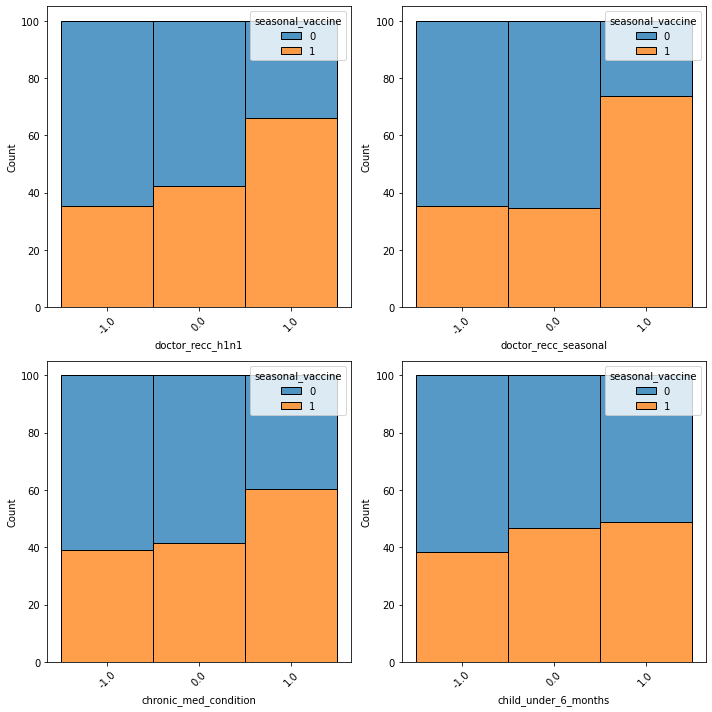

In [870]:

#proportion of values with missing values with respect to seasonal vaccine
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i in range(2):
    for j in range(2):
        df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
        grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
        grouped[columns[index]] = grouped[columns[index]].astype(str)
        grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
        labels = grouped[columns[index]].unique()
        sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack',ax=axes[i,j])
        axes[i,j].tick_params(axis='x', rotation=45)
        index = index + 1

plt.tight_layout()
plt.show()

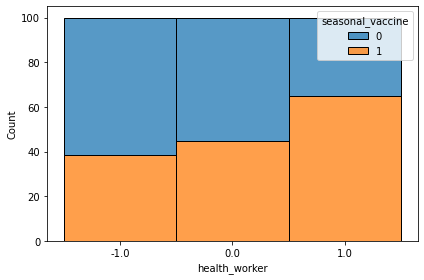

In [871]:

#proportion of values with missing values with respect to seasonal vaccine
df_h_Lok[columns[index]].fillna(missing_values[index],inplace=True)
grouped = df_h_Lok.groupby([columns[index], 'seasonal_vaccine']).size().reset_index(name='count')
grouped[columns[index]] = grouped[columns[index]].astype(str)
grouped['percentage'] = grouped.groupby(columns[index])['count'].apply(lambda x: 100 * x / x.sum())
labels = grouped[columns[index]].unique()
sns.histplot(data=grouped, x=columns[index], hue='seasonal_vaccine', weights='percentage', multiple='stack')
plt.tight_layout()
plt.show()

In [872]:

#missing values are replaced with the values which have same proportion
df_s["education"].fillna("< 12 Years", inplace=True)
df_s["income_poverty"].fillna("<= $75,000, Above Poverty", inplace=True)
df_s["employment_status"].fillna("Employed", inplace=True)
df_s["household_adults"].fillna(-1, inplace=True)
df_s["marital_status"].fillna("unknown", inplace=True)
df_s["h1n1_concern"].fillna(1, inplace=True)
df_s["h1n1_knowledge"].fillna(1, inplace=True)
df_s["opinion_h1n1_vacc_effective"].fillna(3, inplace=True)
df_s["opinion_h1n1_risk"].fillna(2, inplace=True)
df_s["opinion_h1n1_sick_from_vacc"].fillna(3, inplace=True)
df_s["opinion_seas_vacc_effective"].fillna(4, inplace=True)
df_s["opinion_seas_risk"].fillna(2, inplace=True)
df_s["behavioral_antiviral_meds"].fillna(2, inplace=True)
df_s["behavioral_avoidance"].fillna(1, inplace=True)
df_s["behavioral_face_mask"].fillna(1, inplace=True)
df_s["behavioral_wash_hands"].fillna(1, inplace=True)
df_s["behavioral_large_gatherings"].fillna(1, inplace=True)
df_s["behavioral_outside_home"].fillna(1, inplace=True)
df_s["behavioral_touch_face"].fillna(1, inplace=True)
df_s["doctor_recc_h1n1"].fillna(0, inplace=True)
df_s["doctor_recc_seasonal"].fillna(0, inplace=True)
df_s["chronic_med_condition"].fillna(0, inplace=True)
df_s["child_under_6_months"].fillna(-1, inplace=True)
df_s["health_worker"].fillna(0, inplace=True)
df_s["health_insurance"].fillna(1, inplace=True)
df_s["household_children"].fillna(-1, inplace=True)
df_s["rent_or_own"].fillna("Own", inplace=True)
df_s["opinion_seas_sick_from_vacc"].fillna(5, inplace=True)

In [873]:

#the attribute called geo region percentage is created in which the values are the percentage of vaccination 
#taken in that region
aggreg = df_s.groupby(['hhs_geo_region', 'seasonal_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('hhs_geo_region')['count'].apply(lambda x: 100 * x / x.sum())
seasonal_vaccine_percentage = {}
for d in aggreg.loc[aggreg["seasonal_vaccine"] == 1].iterrows():
    seasonal_vaccine_percentage[d[1][0]] = round(d[1][3] /100, 4)
df_s['hhs_geo_region_percentage'] = df_s["hhs_geo_region"].map(seasonal_vaccine_percentage)

In [874]:

#the attribute called employment industry percentage is created in which the values are the percentage of people 
#in that industry taken vaccination
df_s["employment_industry"].fillna("unknown", inplace=True)
aggreg = df_s.groupby(['employment_industry', 'seasonal_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('employment_industry')['count'].apply(lambda x: 100 * x / x.sum())
employment_industry_percentage = {}
for d in aggreg.loc[aggreg["seasonal_vaccine"] == 1].iterrows():
    employment_industry_percentage[d[1][0]] = round(d[1][3] /100, 4)
df_s['employment_industry_percentage'] = df_s["employment_industry"].map(employment_industry_percentage)

In [875]:

#the attribute called employment occupation percentage is created in which the values are the percentage of people 
#in that occupation taken vaccination
df_s["employment_occupation"].fillna("unknown", inplace=True)
aggreg = df_s.groupby(['employment_occupation', 'seasonal_vaccine']).size().reset_index(name='count')
aggreg['percentage'] = aggreg.groupby('employment_occupation')['count'].apply(lambda x: 100 * x / x.sum())
employment_occupation_percentage = {}
for d in aggreg.loc[aggreg["seasonal_vaccine"] == 1].iterrows():
    employment_occupation_percentage[d[1][0]] = round(d[1][3] /100,4)
df_s['employment_occupation_percentage'] = df_s["employment_occupation"].map(employment_occupation_percentage)

In [876]:
 
#the data is processed using pipeline and column transfer
X = do_preprocess(df_s)
df_s_p = pd.DataFrame(X, columns=columns_label)

In [877]:
#target and other attributes were seperated
train_s = df_s_p.iloc[:,:-2]
target_s = df_s_p.iloc[:,-1]

In [878]:
#test and training set are separated
from sklearn.model_selection import train_test_split
X_tr, X_tt, Y_tr, Y_tt =  train_test_split(train_s, target_s, test_size = 0.2,random_state=42,shuffle=True)

In [727]:

#using randomizedCV with K-fold cross validation 3 optimal parameter for XGBosst classifier is searched
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.01, objective = 'binary:logistic', eval_metric="auc")
param_xgb = {
    "max_depth": [5,8,10,15],
    "subsample" : [1, 0.9,0.8, 0.7],
    "n_estimators" : [100, 120, 200, 250],
    "gamma" : [0, 0.25, 0.5],
    "alpha" : [0, 0.7, 0.9, 1]
    
}
xgb_m = RandomizedSearchCV(estimator=xgb, param_distributions=param_xgb, cv=3,n_jobs=-1, n_iter=30)
xgb_m.fit(X_tr, Y_tr)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_delta_step=None, max_depth=None,
               

In [728]:

#best parameter for xgboost classifer
xgb_m.best_params_

{'subsample': 0.8,
 'n_estimators': 250,
 'max_depth': 8,
 'gamma': 0.5,
 'alpha': 1}

In [729]:

#Random forest classifier is used to find best parameters to predict seasonal vaccine
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
dcls = RandomForestClassifier(n_jobs=-1, class_weight = "balanced")
param_dist = {
    'n_estimators': np.arange(360, 370, 3),
    'max_depth': [22,23,24,25],
    'max_features': ['sqrt', 'log2','auto'],
    "min_samples_leaf" : [2, 3, 4]
    }

random_search = RandomizedSearchCV(estimator=dcls, param_distributions=param_dist, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_tr, Y_tr)
random_search.best_params_

{'n_estimators': 369,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 25}

In [733]:

#Random forest classifier is obtained using best parameter obtained
rf_best_s = RandomForestClassifier(class_weight = "balanced", n_estimators = 369, min_samples_leaf = 4, 
                                   max_features = 'sqrt', max_depth = 25, n_jobs=-1)

In [734]:

#ROC AUC score using cross validation for random forest classifier
crs_rf_s = cross_val_predict(rf_best_s, X_tr, Y_tr, cv = 3, method = "predict_proba")
roc_auc_score(Y_tr, crs_rf_s[:, 1])

0.8556127727217427

In [735]:

#ROC AUC score of XGBoost classifier is obtained using cross validation
xgb_best_s = XGBClassifier(learning_rate = 0.01, objective = 'binary:logistic', eval_metric="auc", subsample = 0.8,
                           n_estimators = 250, max_depth = 8, gamma = 0.5, alpha = 1)
crs_xgb_s = cross_val_predict(xgb_best_s, X_tr, Y_tr, cv = 3, method = "predict_proba")
roc_auc_score(Y_tr, crs_xgb_s[:, 1])

0.8544453614140414

In [739]:
#models were fitted on training set and prediction for test set is obtained


xgb_best_s = XGBClassifier(learning_rate = 0.01, objective = 'binary:logistic', eval_metric="auc", subsample = 0.9,
                         n_estimators = 250, max_depth = 8, gamma = 0.25, alpha = 0)
xgb_best_s.fit(X_tr, Y_tr)
xgb_best_s_p = xgb_best_s.predict_proba(X_tt)[:, 1]
xgb_best_p = xgb_best_s.predict(X_tt)


rf_best_s = RandomForestClassifier(class_weight = "balanced", n_estimators = 366, min_samples_leaf = 4, 
                                   max_features = 'sqrt', max_depth = 25, n_jobs=-1)
rf_best_s.fit(X_tr, Y_tr)
rf_best_s_p = rf_best_s.predict_proba(X_tt)[:, 1]
rf_best_p = rf_best_s.predict(X_tt)


In [743]:

#precision, recall, f1score, rocauc score for test set is obtained
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(Y_tt, xgb_best_p))
print(recall_score(Y_tt, xgb_best_p))
print(f1_score(Y_tt, xgb_best_p))
print(roc_auc_score(Y_tt, xgb_best_s_p))

0.773978315262719
0.7572419420644635
0.7655186636419881
0.85853394113698


In [744]:

#precision, recall, f1score, rocauc score for test set is obtained
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(Y_tt, rf_best_p))
print(recall_score(Y_tt, rf_best_p))
print(f1_score(Y_tt, rf_best_p))
print(roc_auc_score(Y_tt, rf_best_s_p))

0.7691377921031426
0.7788657690738474
0.7739712142712345
0.85909421337566


In [742]:
#false positive and true positive rate obtained for test set
from sklearn.metrics import roc_curve

fpr_xg, tpr_xg, thresholds = roc_curve(Y_tt, xgb_best_s_p)

fpr_rf, tpr_rf, thresholds = roc_curve(Y_tt, rf_best_s_p)


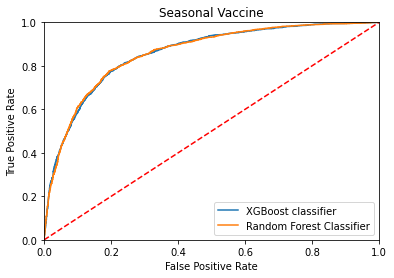

In [745]:

plt.plot(fpr_xg, tpr_xg, label="XGBoost classifier") 
plt.plot(fpr_rf, tpr_rf, label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Seasonal Vaccine")
plt.legend(loc="lower right")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.show()

In [508]:

correlation_matrix = df_s_p.corr()

In [509]:

correlation_matrix["seasonal_vaccine"].abs().sort_values(ascending=False).index

Index(['seasonal_vaccine', 'opinion_seas_risk', 'h1n1_vaccine',
       'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'age_group',
       'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective',
       'employment_industry_percentage', 'doctor_recc_h1n1',
       'employment_occupation_percentage', 'chronic_med_condition',
       'employment_status', 'h1n1_concern', 'health_worker',
       'health_insurance', 'behavioral_touch_face', 'h1n1_knowledge',
       'behavioral_wash_hands', 'household_children', 'bin_s__rent_or_own',
       'race', 'bin_s__sex', 'education', 'behavioral_avoidance',
       'opinion_seas_sick_from_vacc', 'behavioral_large_gatherings',
       'income_poverty', 'marital_status', 'behavioral_outside_home',
       'household_adults', 'behavioral_face_mask', 'hhs_geo_region_percentage',
       'child_under_6_months', 'opinion_h1n1_sick_from_vacc',
       'MSA, Not Principle  City', 'MSA, Principle City',
       'behavioral_antiviral_meds', 'Non-MSA'],
      dtype='

In [512]:

important_correlation = df_h_p[["seasonal_vaccine","opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
                              "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                              "opinion_seas_risk", "opinion_seas_sick_from_vacc", 
                               "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition"]].corr()

<AxesSubplot:>

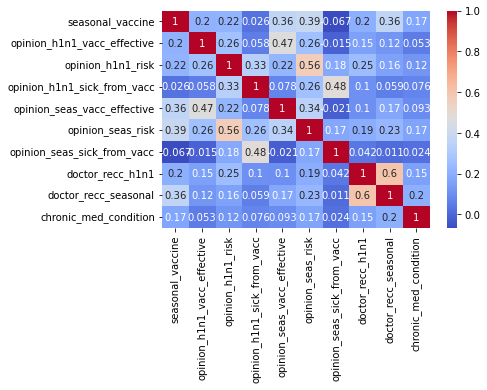

In [513]:

sns.heatmap(important_correlation,
            annot=True, cmap="coolwarm")

In [565]:

#random forest classifier with depth 3 using columns which have high correlation
rf_sub_question = RandomForestClassifier(n_estimators = 30, min_samples_leaf = 2,
                                 class_weight = "balanced",  max_depth = 3, random_state=123)

In [566]:

#column with high correlation such as opinion and doctor recommendation
rf_sub_question.fit(train_s[["opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
                    "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                    "opinion_seas_risk", "opinion_seas_sick_from_vacc", "doctor_recc_h1n1",
                    "doctor_recc_seasonal", "chronic_med_condition"]],
                    target_s)

RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=2,
                       n_estimators=30, random_state=123)

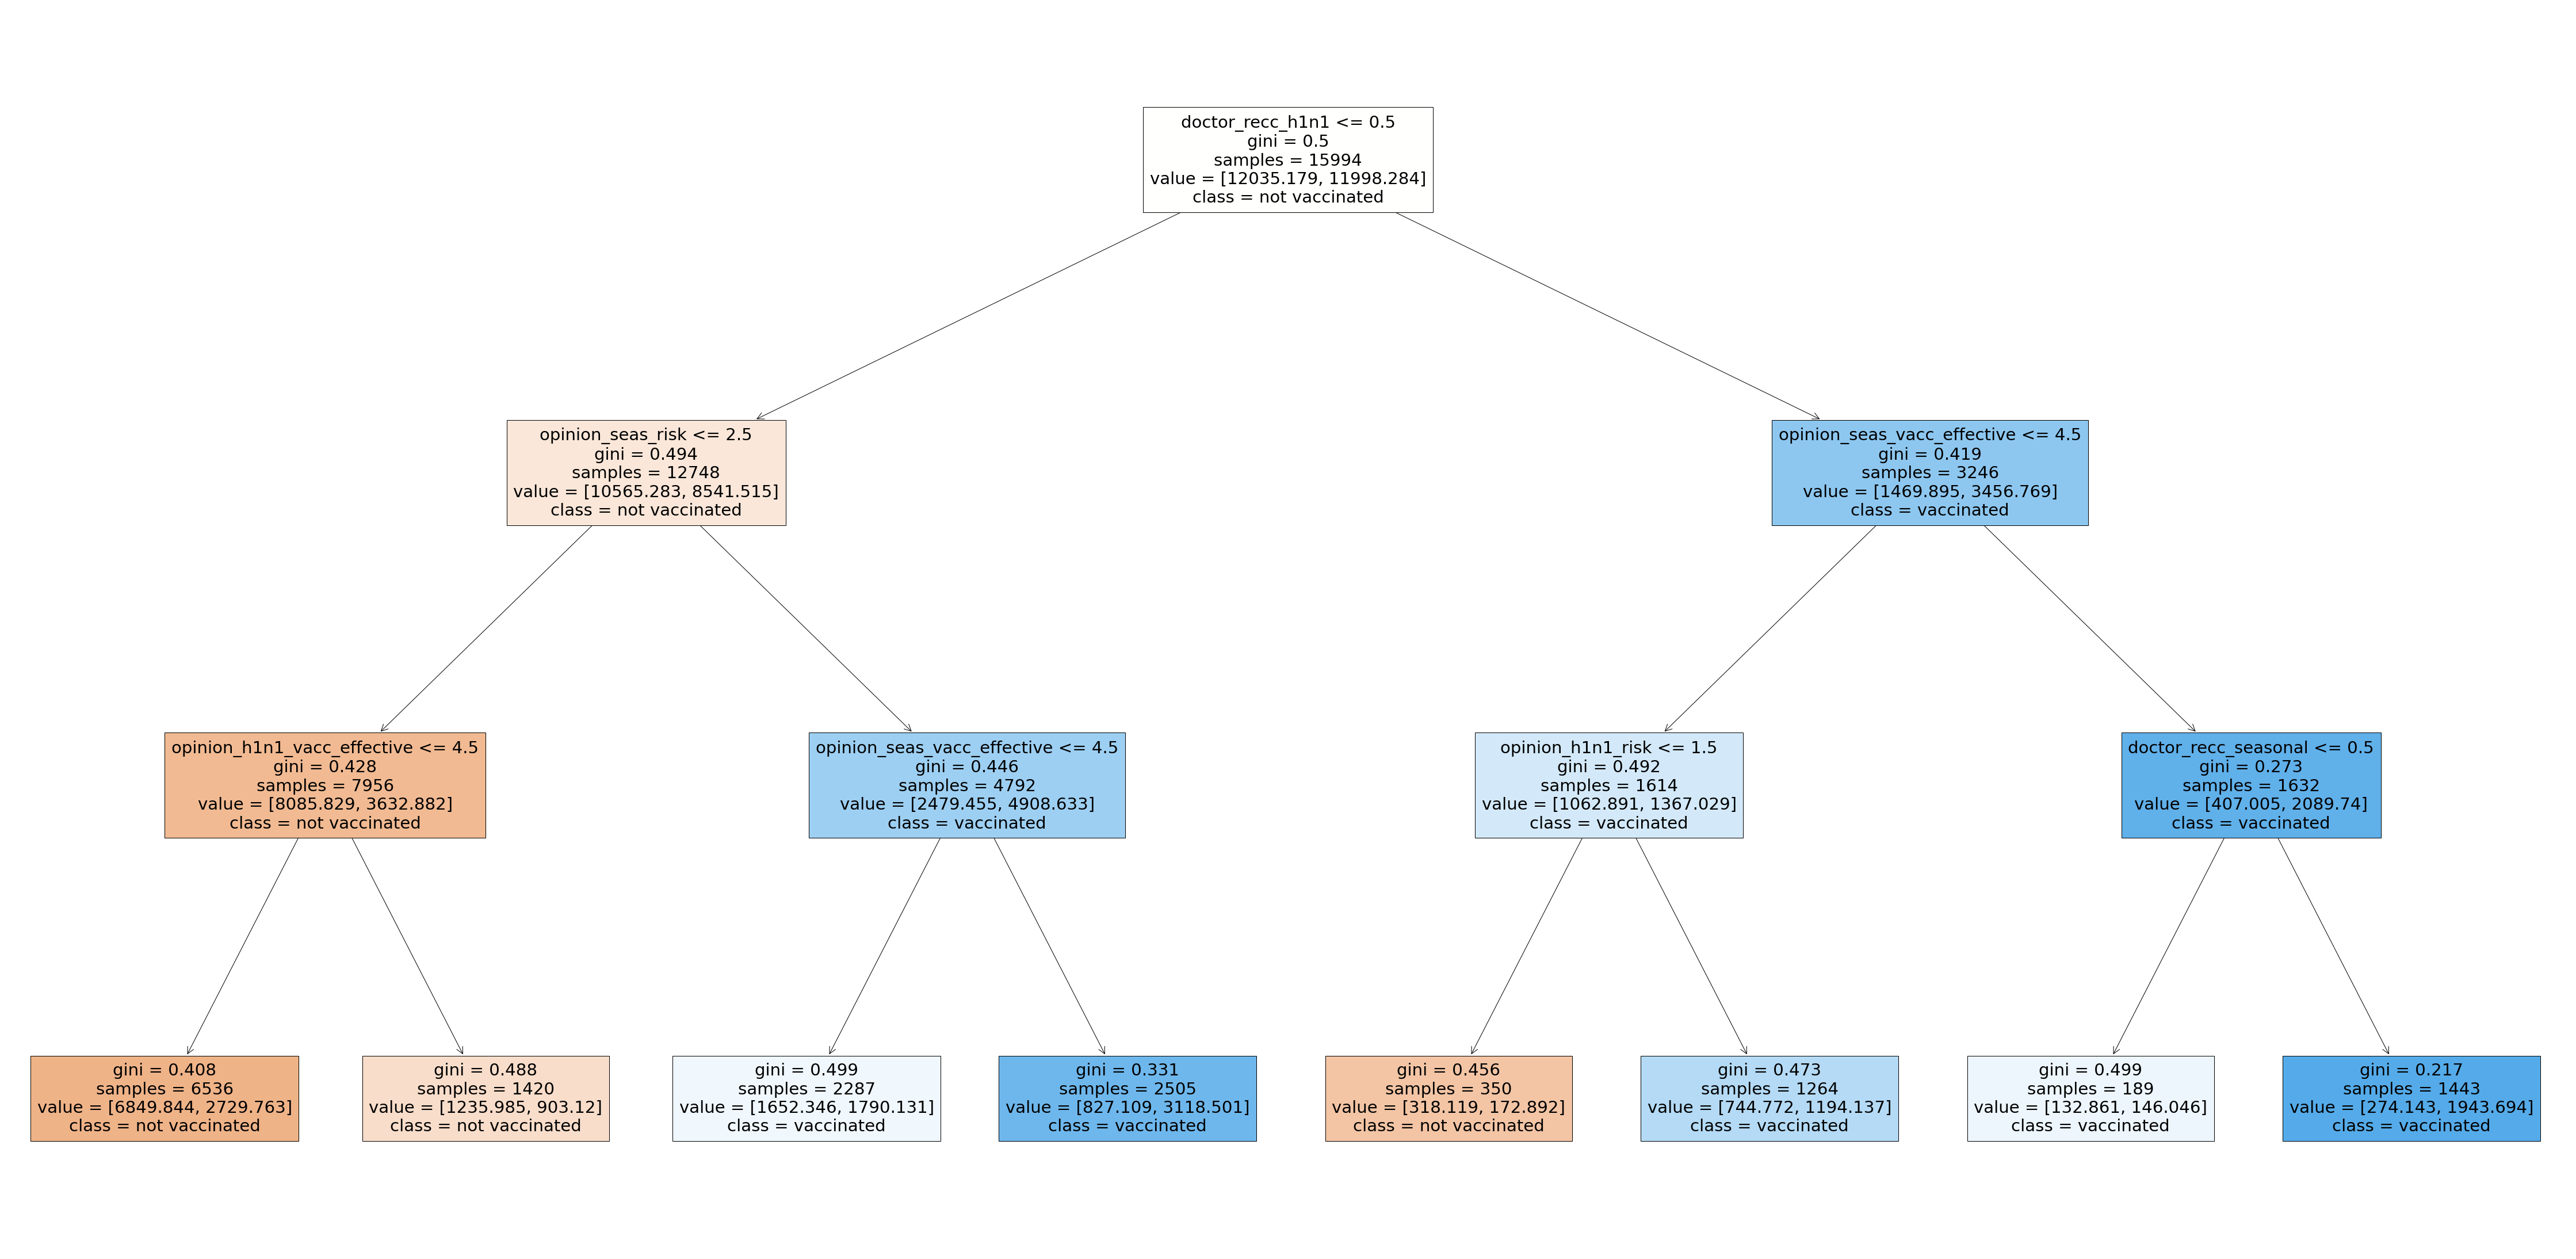

In [567]:

#from sklearn.tree import plot_tree
tree = rf_sub_question.estimators_[0]
plt.figure(figsize=(80,40))
plot_tree(best_tree, feature_names = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk",
                    "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                    "opinion_seas_risk", "opinion_seas_sick_from_vacc", "doctor_recc_h1n1",
                    "doctor_recc_seasonal", "chronic_med_condition"],
          class_names=['not vaccinated', "vaccinated"],filled=True);
plt.show()

In [597]:

#contigency table for doctor recommendation and seasonal vaccine 
contingency_table = pd.crosstab(target_s, train_s['doctor_recc_h1n1'])
contingency_table

doctor_recc_h1n1,0.0,1.0
seasonal_vaccine,,
0.0,12445,1827
1.0,8854,3581


Null Hypothesis : There is no relationship between doctor recommendation of H1n1 vaccine and seasonal vaccination
Alternate Hypothesis : There is relationship between doctor recommendation of H1n1 vaccine and seasonal vaccination

In [614]:

#chi square test 
from scipy.stats import chi2_contingency
from scipy.stats import chi2
alpha = 0.05 
chisq, p, df, expected = chi2_contingency(contingency_table)
critical_chisq_value = chi2.ppf(1 - alpha, df)
print("Chi-square critical value:" , critical_chisq_value)
print("Chi-square value:", chisq)
print("Probability:", p)
print("Degrees of freedom:", df)
print("Expected frequencies:", expected)


Chi-square critical value: 9.487729036781154
Chi-square value: 4043.722106317696
Probability: 0.0
Degrees of freedom: 4
Expected frequencies: [[3192.45620998 5059.62092335  361.78320291 4077.40891901 1580.73074475]
 [2781.54379002 4408.37907665  315.21679709 3552.59108099 1377.26925525]]


In [600]:

if p < alpha: 
    print("we reject the Null hypothesis")
    print("There is 95% confidence that there is relationship between doctor recommendation of H1n1 vaccine and seasonal vaccination")
else:
    print("we accept the Null hypothesis")
    print("There is 95% confidence that there is no relationship between doctor recommendation of H1n1 vaccine and seasonal vaccination")

we reject the Null hypothesis
There is 95% confidence that there is relationship between doctor recommendation of H1n1 vaccine and seasonal vaccination


Null Hypothesis : There is no relationship between people opinion on seasonal flu risk and seasonal vaccination
Alternate Hypothesis : There is relationship between opinion on seasonal flu risk and seasonal vaccination

In [607]:
#contigency table for opinion of seasonal flu risk and seasonal vaccine
contingency_table = pd.crosstab(target_s, train_s['opinion_seas_risk'])
contingency_table

opinion_seas_risk,1.0,2.0,3.0,4.0,5.0
seasonal_vaccine,,,,,
0.0,4723,5926,300,2568,755
1.0,1251,3542,377,5062,2203


In [613]:

#chi sq test
chisq, prob, df, expected = chi2_contingency(contingency_table)
alpha = 0.05 
critical_chisq_value = chi2.ppf(1 - alpha, df)
print("Chi-square critical value:" , critical_chisq_value)
print("Chi-square value:", chisq)
print("Probability:", prob)
print("Degrees of freedom:", df)
print("Expected frequencies:", expected)

Chi-square critical value: 9.487729036781154
Chi-square value: 4043.722106317696
Probability: 0.0
Degrees of freedom: 4
Expected frequencies: [[3192.45620998 5059.62092335  361.78320291 4077.40891901 1580.73074475]
 [2781.54379002 4408.37907665  315.21679709 3552.59108099 1377.26925525]]


In [615]:

if prob < alpha: 
    print("we reject the Null hypothesis")
    print("There is 95% confidence that there is relationship between opinion on seasonal flu risk and seasonal vaccination")
else:
    print("we accept the Null hypothesis")
    print("There is 95% confidence that there is no relationship between opinion on seasonal flu risk and seasonal vaccination")

we reject the Null hypothesis
There is 95% confidence that there is relationship between opinion on seasonal flu risk and seasonal vaccination
